# Introduction
## Before you begin
Please ensure you have referred to Esther-Setup.ipynb in the repository and have properly setup your environment.

# Setting up the environment
This first cell sets up the Text-Fabric.

You will notice it also sets up various other environments to assist in the data visualization.

The cell installs is the Hebrew Bible (BHS).

Due to the limits of the Github download size, you may wish to install the rest of the biblele one by one by selectively removing the hastag (#) sign before the command line. You only have to download the bible once onto your machine, but there are limits to the download per hour placed by Github.

The other Bibles that may be downloaded are the Greek Bible (Nestle Aland 1904), the Septuagint (LXX), and the Dead Sea Scrolls (DSS).

If you are unable to install the bible in the terminal tab of the Jupyter program or app, you may wish to run the following terminal commands ONE AT A TIME:

cd

pip3 install 'text-fabric[all]'

pip3 install --upgrade text-fabric

cd text-fabric-data

git clone https://github.com/ETCBC/bhsa

git clone https://github.com/CenterBLC/BHSaddons

git clone https://github.com/ETCBC/dss

git clone https://github.com/CenterBLC/LXX

git clone https://github.com/CenterBLC/N1904



In [1]:
!pip3 install 'text-fabric[all]'
!pip3 install --upgrade text-fabric
!pip3 install pandas 
!pip3 install numpy 
!pip3 install scipy 
!pip3 install matplotlib 
!pip3 install plotly
from pathlib import Path
import json, math
from collections import Counter
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import sys, os, collections
import seaborn as sns
from tf.fabric import Fabric
from tf.app import use
from matplotlib.pyplot import figure
from collections import Counter
BHS = use('etcbc/bhsa', version="2021", mod='CenterBLC/BHSaddons/tf', hoist=globals())
bhsF, bhsL, bhsT, bhsS = BHS.api.F, BHS.api.L, BHS.api.T, BHS.api.S

LXX = use("CenterBLC/LXX", version="1935", hoist=globals())
lxxF, lxxL, lxxT, lxxS = LXX.api.F, LXX.api.L, LXX.api.T, LXX.api.S

DSS = use('etcbc/dss', hoist=globals())
dssF, dssL, dssT, dssS = DSS.api.F, DSS.api.L, DSS.api.T, DSS.api.S

GNT = use ("CenterBLC/N1904", version="1.0.0", mod="CenterBLC/N1904/BOLcomplement/tf/", hoist=globals())
gntF, gntL, gntT, gntS = GNT.api.F, GNT.api.L, GNT.api.T, GNT.api.S


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,39,10938.21,100
chapter,929,459.19,100
lex,9230,46.22,100
verse,23213,18.38,100
half_verse,45179,9.44,100
sentence,63717,6.70,100
sentence_atom,64514,6.61,100
clause,88131,4.84,100
clause_atom,90704,4.70,100
phrase,253203,1.68,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,57,10941.98,100
chapter,1192,523.23,100
verse,30371,20.54,100
subverse,30419,20.50,100
word,623693,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
scroll,1001,1428.81,100
lex,10450,129.14,94
fragment,11182,127.91,100
line,52895,27.04,100
clause,125,12.85,0
cluster,101099,6.68,47
phrase,315,5.10,0
word,500995,2.81,99
sign,1430241,1.00,100


**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

# The following cells will provide examples of what you can do within the Text-Fabric environment

## Visual representation of wayyiqtol verbs compared with X-qatal occurences
This sets up the occurences of wayyiqtol (green) against the X-qatal verbs (orange) in Esther.

The first cell searches for all the wayyiqtol occurneces in Esther.

In [2]:
EstherWayyiqtolSearch = '''
chapter book=Esther
   clause typ=WayX
'''
EstherWayyiqtolSearch  = BHS.search(EstherWayyiqtolSearch)
BHS.table(EstherWayyiqtolSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)


  0.05s 92 results


We then search for all the X-qatal occurneces in Esther

In [3]:
EstherxQtXSearch = '''
chapter book=Esther
   clause typ=xQtX
'''
EstherxQtXSearch  = BHS.search(EstherxQtXSearch)
BHS.table(EstherxQtXSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.03s 40 results


n,p,verse,clause
1,Esther 1:8,,כִּי־כֵ֣ן׀ יִסַּ֣ד הַמֶּ֗לֶךְ עַ֚ל כָּל־רַ֣ב בֵּיתֹ֔ו
2,Esther 1:16,,לֹ֤א עַל־הַמֶּ֨לֶךְ֙ לְבַדֹּ֔ו עָוְתָ֖ה וַשְׁתִּ֣י הַמַּלְכָּ֑ה
3,Esther 2:6,,אֲשֶׁ֣ר הֶגְלָ֔ה נְבוּכַדְנֶאצַּ֖ר מֶ֥לֶךְ בָּבֶֽל׃
4,Esther 2:10,,לֹא־הִגִּ֣ידָה אֶסְתֵּ֔ר אֶת־עַמָּ֖הּ וְאֶת־מֹֽולַדְתָּ֑הּ
5,Esther 2:14,,כִּ֣י אִם־חָפֵ֥ץ בָּ֛הּ הַמֶּ֖לֶךְ


We then export the data to their respective .tsv files

In [4]:
BHS.export(EstherWayyiqtolSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='EstherWayyiqtolSearch.tsv')

In [5]:
BHS.export(EstherxQtXSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='EstherxQtXSearch.tsv')

In [6]:
EstherWayyiqtolSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/EstherWayyiqtolSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
EstherWayyiqtolSearch.head(11)

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,typ2
0,1,Esther,1,12,427449,chapter,Esther,505306,clause,וַתְּמָאֵ֞ן הַמַּלְכָּ֣ה וַשְׁתִּ֗י,WayX
1,2,Esther,1,12,427449,chapter,Esther,505309,clause,וַיִּקְצֹ֤ף הַמֶּ֨לֶךְ֙ מְאֹ֔ד,WayX
2,3,Esther,1,13,427449,chapter,Esther,505311,clause,וַיֹּ֣אמֶר הַמֶּ֔לֶךְ לַחֲכָמִ֖ים יֹדְעֵ֣י הָֽ...,WayX
3,4,Esther,1,16,427449,chapter,Esther,505319,clause,וַיֹּ֣אמֶר מְמוּכָ֗ן לִפְנֵ֤י הַמֶּ֨לֶךְ֙ וְהַ...,WayX
4,5,Esther,1,21,427449,chapter,Esther,505343,clause,וַיִּיטַב֙ הַדָּבָ֔ר בְּעֵינֵ֥י הַמֶּ֖לֶךְ וְה...,WayX
5,6,Esther,1,21,427449,chapter,Esther,505344,clause,וַיַּ֥עַשׂ הַמֶּ֖לֶךְ כִּדְבַ֥ר מְמוּכָֽן׃,WayX
6,7,Esther,2,2,427450,chapter,Esther,505354,clause,וַיֹּאמְר֥וּ נַעֲרֵֽי־הַמֶּ֖לֶךְ מְשָׁרְתָ֑יו,WayX
7,8,Esther,2,4,427450,chapter,Esther,505361,clause,וַיִּיטַ֧ב הַדָּבָ֛ר בְּעֵינֵ֥י הַמֶּ֖לֶךְ,WayX
8,9,Esther,2,8,427450,chapter,Esther,505377,clause,וַתִּלָּקַ֤ח אֶסְתֵּר֙ אֶל־בֵּ֣ית הַמֶּ֔לֶךְ א...,WayX
9,10,Esther,2,9,427450,chapter,Esther,505378,clause,וַתִּיטַ֨ב הַנַּעֲרָ֣ה בְעֵינָיו֮,WayX


In [7]:
EstherxQtXSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/EstherxQtXSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
EstherxQtXSearch.head(11)

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,typ2
0,1,Esther,1,8,427449,chapter,Esther,505296,clause,כִּי־כֵ֣ן׀ יִסַּ֣ד הַמֶּ֗לֶךְ עַ֚ל כָּל־רַ֣ב ב...,xQtX
1,2,Esther,1,16,427449,chapter,Esther,505320,clause,לֹ֤א עַל־הַמֶּ֨לֶךְ֙ לְבַדֹּ֔ו עָוְתָ֖ה וַשְׁת...,xQtX
2,3,Esther,2,6,427450,chapter,Esther,505368,clause,אֲשֶׁ֣ר הֶגְלָ֔ה נְבוּכַדְנֶאצַּ֖ר מֶ֥לֶךְ בָּ...,xQtX
3,4,Esther,2,10,427450,chapter,Esther,505385,clause,לֹא־הִגִּ֣ידָה אֶסְתֵּ֔ר אֶת־עַמָּ֖הּ וְאֶת־מֹ...,xQtX
4,5,Esther,2,14,427450,chapter,Esther,505405,clause,כִּ֣י אִם־חָפֵ֥ץ בָּ֛הּ הַמֶּ֖לֶךְ,xQtX
5,6,Esther,2,20,427450,chapter,Esther,505426,clause,כַּאֲשֶׁ֛ר צִוָּ֥ה עָלֶ֖יהָ מָרְדֳּכָ֑י,xQtX
6,7,Esther,2,21,427450,chapter,Esther,505429,clause,בַּיָּמִ֣ים הָהֵ֔ם קָצַף֩ בִּגְתָ֨ן וָתֶ֜רֶשׁ ...,xQtX
7,8,Esther,3,1,427451,chapter,Esther,505440,clause,אַחַ֣ר׀ הַדְּבָרִ֣ים הָאֵ֗לֶּה גִּדַּל֩ הַמֶּ֨...,xQtX
8,9,Esther,3,2,427451,chapter,Esther,505447,clause,כִּי־כֵ֖ן צִוָּה־לֹ֣ו הַמֶּ֑לֶךְ,xQtX
9,10,Esther,3,12,427451,chapter,Esther,505497,clause,אֲשֶׁר־צִוָּ֣ה הָמָ֡ן,xQtX


Next, we form two dataframes. The first dataframe, df1 will contain the results of the wayyiqtol search and a second dataframe, df2 will contain the search results for the X-qatal occurences.

In [8]:

# Example: if df1 and df2 are CSVs
df1 = EstherWayyiqtolSearch
df2 = EstherxQtXSearch

# Add source column
df1["source"] = "EstherWayyiqtolSearch"
df2["source"] = "EstherXQtXSearch"

# Combine into one DataFrame
combined_df = pd.concat([df1, df2], ignore_index=True)

# (Optional) check the result
print(combined_df.head())

   R      S1  S2  S3   NODE1    TYPE1   book1   NODE2   TYPE2  \
0  1  Esther   1  12  427449  chapter  Esther  505306  clause   
1  2  Esther   1  12  427449  chapter  Esther  505309  clause   
2  3  Esther   1  13  427449  chapter  Esther  505311  clause   
3  4  Esther   1  16  427449  chapter  Esther  505319  clause   
4  5  Esther   1  21  427449  chapter  Esther  505343  clause   

                                               TEXT2  typ2  \
0               וַתְּמָאֵ֞ן הַמַּלְכָּ֣ה וַשְׁתִּ֗י   WayX   
1                    וַיִּקְצֹ֤ף הַמֶּ֨לֶךְ֙ מְאֹ֔ד   WayX   
2  וַיֹּ֣אמֶר הַמֶּ֔לֶךְ לַחֲכָמִ֖ים יֹדְעֵ֣י הָֽ...  WayX   
3  וַיֹּ֣אמֶר מְמוּכָ֗ן לִפְנֵ֤י הַמֶּ֨לֶךְ֙ וְהַ...  WayX   
4  וַיִּיטַב֙ הַדָּבָ֔ר בְּעֵינֵ֥י הַמֶּ֖לֶךְ וְה...  WayX   

                  source  
0  EstherWayyiqtolSearch  
1  EstherWayyiqtolSearch  
2  EstherWayyiqtolSearch  
3  EstherWayyiqtolSearch  
4  EstherWayyiqtolSearch  


An "lmplot" is then constructed showing the results with the wayyiqtols occurences appearing in green and the X-qatal occurences in orange.

Text(0.5, 33.99999999999999, 'Chapters in Esther')

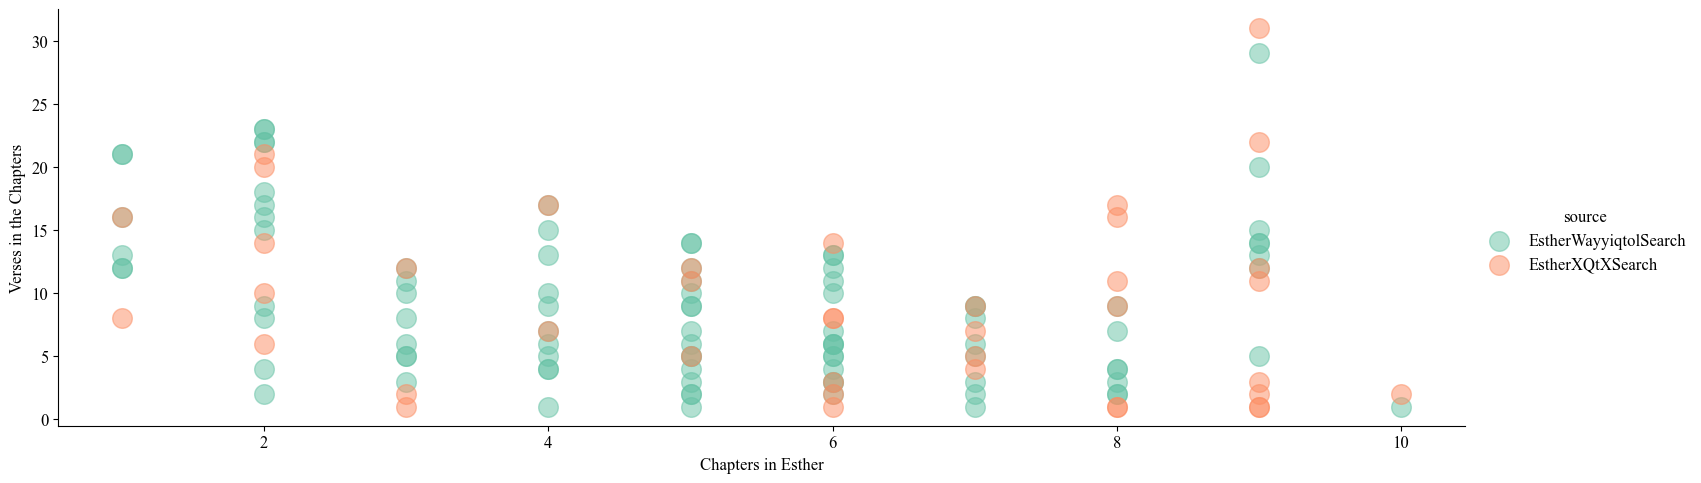

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the font family to Times New Roman and font size to 12
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12

sns.lmplot(data=combined_df, x="S2", y="S3", hue="source", height=5, aspect=9/3, fit_reg=False, scatter_kws={"s": 200, "alpha":0.5}, palette="Set2")
ax = plt.gca()
ax.set_ylabel('Verses in the Chapters')
ax.set_xlabel('Chapters in Esther')

## Wayyiqtol occurences in the entire Hebrew Bible
The following code lists all the occurences of a wayyiqtol in the Hebrew Bible and compares this with all the occurences of X-qatal.

It lists only the first 5 occurrences, but can be adjusted to list all the 15 reults by adjusting the last line of the  cell.

In [10]:
BHSWayyiqtolSearch = '''
verse
   clause typ=WayX
'''
BHSWayyiqtolSearch  = BHS.search(BHSWayyiqtolSearch)
BHS.table(BHSWayyiqtolSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)


  0.05s 5893 results


In [11]:
BHSxQtXSearch = '''
verse
   clause typ=xQtX
'''
BHSxQtXSearch  = BHS.search(BHSxQtXSearch)
BHS.table(BHSxQtXSearch, start=1, end=5, extraFeatures={'function', 'lex_utf8'}, condensed=True)

  0.04s 2796 results


n,p,verse,clause
1,Genesis 1:1,,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃
2,Genesis 1:21,,אֲשֶׁר֩ שָׁרְצ֨וּ הַמַּ֜יִם
3,Genesis 2:3,,אֲשֶׁר־בָּרָ֥א אֱלֹהִ֖ים
4,Genesis 2:5,,כִּי֩ לֹ֨א הִמְטִ֜יר יְהוָ֤ה אֱלֹהִים֙ עַל־הָאָ֔רֶץ
5,Genesis 2:23,,כִּ֥י מֵאִ֖ישׁ לֻֽקֳחָה־זֹּֽאת׃


In [12]:
BHS.export(BHSWayyiqtolSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='BHSWayyiqtolSearch.tsv')
BHS.export(BHSxQtXSearch, toDir='/Users/Lisa_1/text-fabric-data/Malcolm-Data', toFile='BHSxQtXSearch.tsv')

In [13]:
BHSWayyiqtolSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/BHSWayyiqtolSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSWayyiqtolSearch.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,typ2
0,1,Genesis,1,3,1414391,verse,וַיֹּ֥אמֶר אֱלֹהִ֖ים יְהִ֣י אֹ֑ור וַֽיְהִי־אֹֽ...,427563,clause,וַיֹּ֥אמֶר אֱלֹהִ֖ים,WayX
1,2,Genesis,1,3,1414391,verse,וַיֹּ֥אמֶר אֱלֹהִ֖ים יְהִ֣י אֹ֑ור וַֽיְהִי־אֹֽ...,427565,clause,וַֽיְהִי־אֹֽור׃,WayX
2,3,Genesis,1,4,1414392,verse,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור כִּי־טֹ֑וב וַי...,427566,clause,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור,WayX
3,4,Genesis,1,4,1414392,verse,וַיַּ֧רְא אֱלֹהִ֛ים אֶת־הָאֹ֖ור כִּי־טֹ֑וב וַי...,427568,clause,וַיַּבְדֵּ֣ל אֱלֹהִ֔ים בֵּ֥ין הָאֹ֖ור וּבֵ֥ין ...,WayX
4,5,Genesis,1,5,1414393,verse,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום וְלַחֹ֖שׁ...,427569,clause,וַיִּקְרָ֨א אֱלֹהִ֤ים׀ לָאֹור֙ יֹ֔ום,WayX


In [14]:
BHSxQtXSearch=pd.read_csv('/Users/Lisa_1/text-fabric-data/Malcolm-Data/BHSxQtXSearch.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
BHSxQtXSearch.head(5)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,typ2
0,1,Genesis,1,1,1414389,verse,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,427559,clause,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,xQtX
1,2,Genesis,1,21,1414409,verse,וַיִּבְרָ֣א אֱלֹהִ֔ים אֶת־הַתַּנִּינִ֖ם הַגְּד...,427632,clause,אֲשֶׁר֩ שָׁרְצ֨וּ הַמַּ֜יִם,xQtX
2,3,Genesis,2,3,1414422,verse,וַיְבָ֤רֶךְ אֱלֹהִים֙ אֶת־יֹ֣ום הַשְּׁבִיעִ֔י ...,427693,clause,אֲשֶׁר־בָּרָ֥א אֱלֹהִ֖ים,xQtX
3,4,Genesis,2,5,1414424,verse,וְכֹ֣ל׀ שִׂ֣יחַ הַשָּׂדֶ֗ה טֶ֚רֶם יִֽהְיֶ֣ה בָ...,427701,clause,כִּי֩ לֹ֨א הִמְטִ֜יר יְהוָ֤ה אֱלֹהִים֙ עַל־הָא...,xQtX
4,5,Genesis,2,23,1414442,verse,וַיֹּאמֶר֮ הָֽאָדָם֒ זֹ֣את הַפַּ֗עַם עֶ֚צֶם מֵ...,427769,clause,כִּ֥י מֵאִ֖ישׁ לֻֽקֳחָה־זֹּֽאת׃,xQtX


The first visualiazation views all the wayyiqtols as they occur in the Hebrew Bible

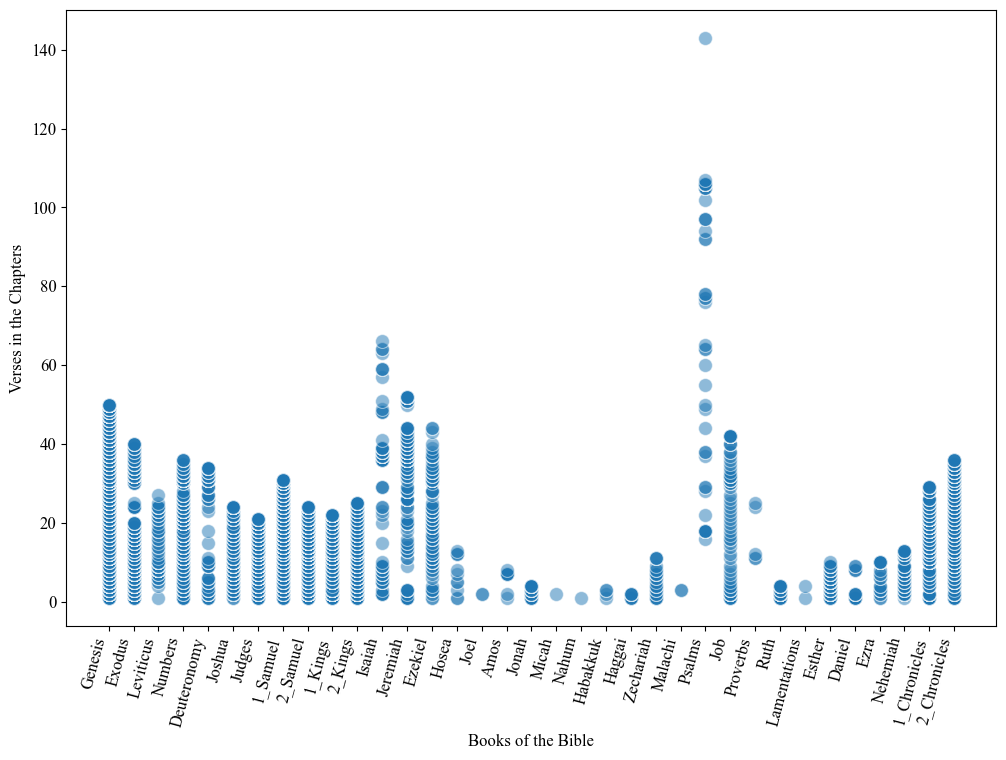

In [22]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=BHSWayyiqtolSearch, x="S1", y="S2", s=100, alpha=0.5)
plt.xticks(rotation=75, ha='right') # Rotate by 45 degrees and align to the right
plt.ylabel('Verses in the Chapters')
plt.xlabel('Books of the Bible')
plt.show()

We shall now plot both dataframes, all the wayyiqtol occurenecs with all the X-qatal occurences, into a single visualization.

In [16]:
df1 = BHSWayyiqtolSearch
df2 = BHSxQtXSearch

df1["source"]="BHSWayyiqtolSearch"
df2["source"]="BHSxQtXSearch"
combined_df=pd.concat([df1, df2])

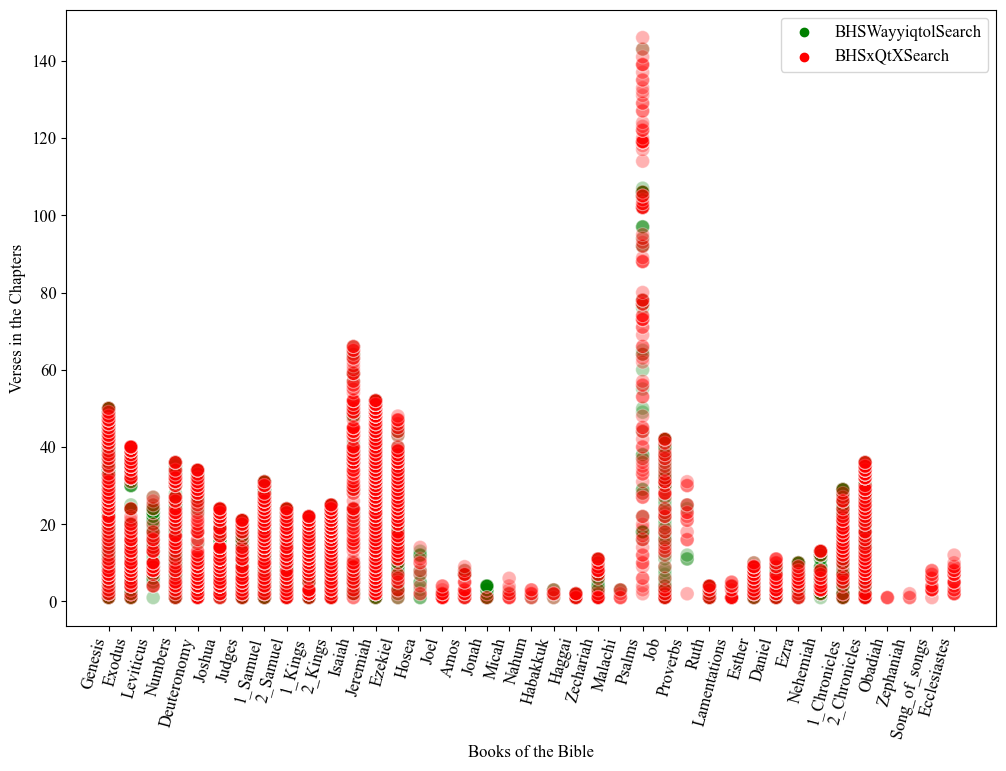

In [20]:
palette = {"Category1": "green", "Category2": "red"}
plt.figure(figsize=(12, 8))  # Increase the figure size (width=12, height=8)
sns.scatterplot(data=combined_df, x="S1", y="S2", hue="source", palette=["green", "red"], s=100, alpha=0.3)
plt.xticks(rotation=75, ha='right') # Rotate by 45 degrees and align to the right
plt.ylabel('Verses in the Chapters')
plt.xlabel('Books of the Bible')
plt.legend()
plt.show()

The last visualization demonstrates some visual tweaks that can be done for the same data.

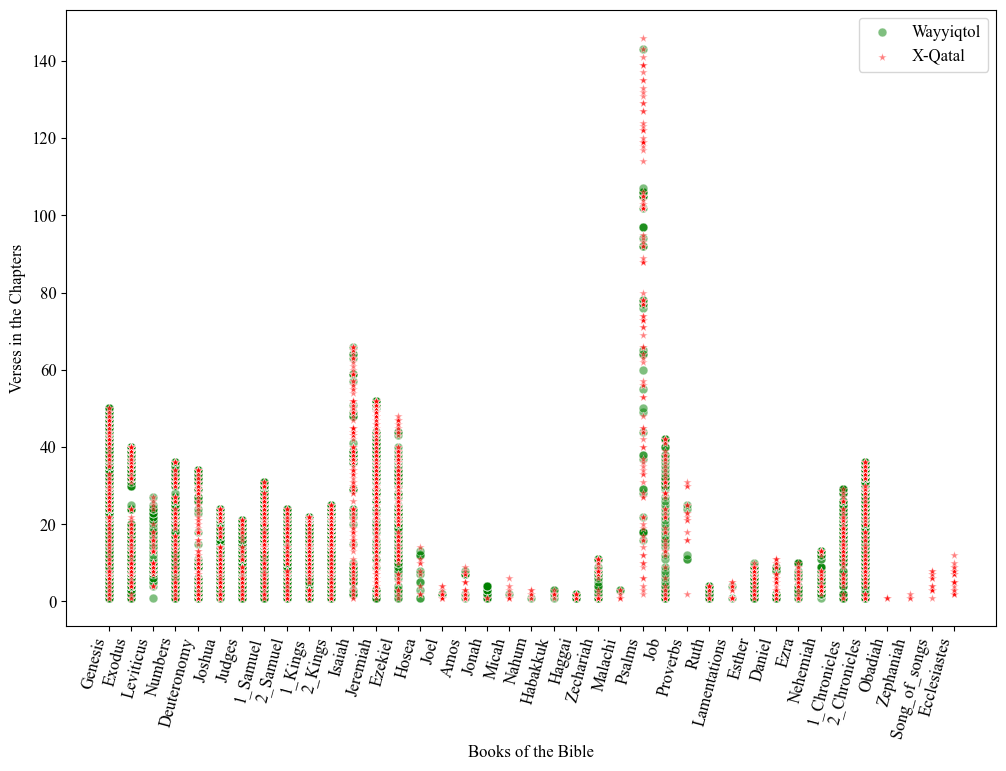

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# First dataframe (green circles)
sns.scatterplot(
    data=df1,
    x="S1",
    y="S2",
    color="green",
    marker="o",   # circle marker
    s=40,
    alpha=0.5,
    label="Wayyiqtol"
)

# Second dataframe (red triangles)
sns.scatterplot(
    data=df2,
    x="S1",
    y="S2",
    color="red",
    marker="*",   # triangle marker
    s=40,
    alpha=0.5,
    label="X-Qatal"
)

plt.xticks(rotation=75, ha='right')
plt.ylabel('Verses in the Chapters')
plt.xlabel('Books of the Bible')
plt.legend()
plt.show()